In [79]:
import sys
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from keras.datasets import mnist
from sklearn import metrics

(x_train, y_train),(x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
x=x_train.reshape((x_train.shape[0],-1))
x=np.divide(x.astype(float),255)

kmeans = KMeans(n_clusters = 10)

kmeans.fit(x)

def inferclusterlabels(kmeans, real_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(real_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]        
    return inferred_labels  

def inferdatalabels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key                
    return predicted_labels

n_clusters=10
cluster_labels = inferclusterlabels(kmeans, y_train)
X_clusters = kmeans.predict(x)
predicted_labels = inferdatalabels(X_clusters, cluster_labels)

def calculate_metrics(estimator, data, labels):
    print('No: of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))
    
clusters = [10]

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(x)
    calculate_metrics(estimator, x, y_train)
    cluster_labels = inferclusterlabels(estimator, y_train)
    predicted_Y = inferdatalabels(estimator.labels_, cluster_labels)

    print('Baseline KMeans Accuracy: {}\n'.format(metrics.accuracy_score(y_train, predicted_Y)))
    

No: of Clusters: 10
Inertia: 1936071.8096302045
Homogeneity: 0.5019436548169947
Baseline KMeans Accuracy: 0.5203



In [80]:
from sklearn.model_selection import train_test_split

x_train=x_train.reshape(-1,28,28,1)/255
x_test=x_test.reshape(-1,28,28,1)/255

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=123)

In [81]:
#autoencoder
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))
model.compile(optimizer='adam', loss="mse")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 14)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 7)         889       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 7)           0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 7)           0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 7, 7, 7)           448       
__________

In [82]:
# Train the model
logdir = "logsk3/"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history=model.fit(x_train, x_train, epochs=100, batch_size=256, validation_data=(x_validate, x_validate), verbose=1, callbacks = [tensorboard_callback])


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 63s 1ms/step - loss: 0.0539 - val_loss: 0.0379
Epoch 2/100
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0311 - val_loss: 0.0276
Epoch 3/100
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0275 - val_loss: 0.0235
Epoch 4/100
48000/48000 [==============================] - 63s 1ms/step - loss: 0.0257 - val_loss: 0.0203
Epoch 5/100
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0244 - val_loss: 0.0194
Epoch 6/100
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0236 - val_loss: 0.0185
Epoch 7/100
48000/48000 [==============================] - 63s 1ms/step - loss: 0.0229 - val_loss: 0.0177
Epoch 8/100
48000/48000 [==============================] - 63s 1ms/step - loss: 0.0223 - val_loss: 0.0177
Epoch 9/100
48000/48000 [==============================] - 65s 1ms/step - loss: 0.0219 - val_loss: 0.0

48000/48000 [==============================] - 65s 1ms/step - loss: 0.0174 - val_loss: 0.0213
Epoch 78/100
48000/48000 [==============================] - 63s 1ms/step - loss: 0.0174 - val_loss: 0.0214
Epoch 79/100
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0174 - val_loss: 0.0214
Epoch 80/100
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0174 - val_loss: 0.0221
Epoch 81/100
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0174 - val_loss: 0.0217
Epoch 82/100
48000/48000 [==============================] - 65s 1ms/step - loss: 0.0174 - val_loss: 0.0213
Epoch 83/100
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0174 - val_loss: 0.0220
Epoch 84/100
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0173 - val_loss: 0.0219
Epoch 85/100
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0174 - val_loss: 0.0219
Epoch 86/100
48000/48000 [========================

In [83]:
encoder = K.function([model.layers[0].input], [model.layers[4].output])
encoded_imgs = encoder([x_test])[0].reshape(-1,7*7*7)
encoded_imgs.shape

(10000, 343)

In [84]:
kmeans_afterencoder = KMeans(n_clusters=10)
clustered_training_set = kmeans_afterencoder.fit_predict(encoded_imgs)

[[173   4  35 260   3   3   1 446   0  75]
 [100   0  11 126   0 710   0   3   0  50]
 [196   5 502 267   3   0   0  19   0   8]
 [146   3  13 239   1   8   0  27   0 563]
 [ 84   8 621 184   5   5   0   7   0  86]
 [773   0   0   8   2   0 153   0  64   0]
 [249   6 276 301  12   2   1  93   0  60]
 [228   0   0   0   3   0 743   0  26   0]
 [152 332  50  79 324   1  52   0   3   7]
 [ 64   2   7  12   2   0 145   0 766   2]]


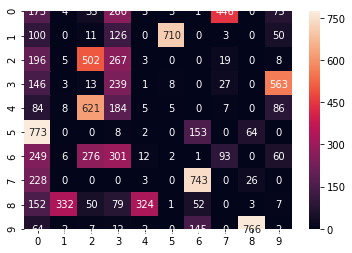

In [85]:
import seaborn as sns

cmKMeans = confusion_matrix(y_test, clustered_training_set)
print(cmKMeans)

sns.heatmap(cmKMeans,annot=True,fmt="d")

In [86]:
cluster_labels = inferclusterlabels(kmeans_afterencoder, y_test)
predicted_labels1 = inferdatalabels(clustered_training_set, cluster_labels)


In [87]:
estimator1 = KMeans(n_clusters=10)
estimator1.fit(encoded_imgs)

calculate_metrics(estimator1, encoded_imgs, y_test)

cluster_labels_AE = inferclusterlabels(estimator1, y_test)
predicted_Y_AE = inferdatalabels(estimator1.labels_, cluster_labels_AE)

print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_Y_AE)))

No: of Clusters: 10
Inertia: 36081.65599057496
Homogeneity: 0.4256171152802742
Accuracy: 0.5254



In [88]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10)
gmm.fit(encoded_imgs)

labelsGMM=gmm.fit_predict(encoded_imgs)


In [89]:
def inferclusterlabels_GMM(gmm, real_labels):
    inferred_labels = {}

    for i in range(gmm.n_components):
        labels = []
        index = np.where(labelsGMM == i)
        labels.append(real_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def inferdatalabels_GMM(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels


In [90]:
cluster_labels_GMM = inferclusterlabels_GMM(gmm, y_test)
predicted_Y_GMM = inferdatalabels_GMM(labelsGMM, cluster_labels_GMM)

print('GMM Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_Y_GMM)))

GMM Accuracy: 0.5468



[[132  47   1 647  26   9  50   0  85   3]
 [ 59   6   0   2 910   1   9   0  13   0]
 [ 97  28   0  10   1 535 210   2 112   5]
 [577  13   0  16 346   2  12   0  31   3]
 [241  18   0   0   6 462 218   3  46   6]
 [  0 346 578   0   0   0   0  67   9   0]
 [177  62   3 164  11 138 293   3 145   4]
 [  0   3 975   0   0   0   0  22   0   0]
 [ 27  95 116   0   1  11  58 285  65 342]
 [  2  20 255   1   0   0  11 698  10   3]]


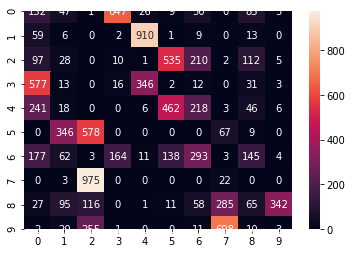

In [91]:
cmGMM = confusion_matrix(y_test, labelsGMM)
print(cmGMM)

sns.heatmap(cmGMM,annot=True,fmt="d")